In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_from_disk

In [2]:
dataset = load_from_disk('../data/datasets/cuneiform/')

# Training Data Examples

In [3]:
test_table = pd.DataFrame({'text':dataset['test']['text'],'label':dataset['test']['label']})
val_table = pd.DataFrame({'text':dataset['val']['text'],'label':dataset['val']['label']})
train_table = pd.DataFrame({'text':dataset['train']['text'],'label':dataset['train']['label']})
display("Training data")
display(train_table)

'Training data'

,text,label
0,𒂔 𒈾 𒆠,0
1,𒊭 𒈗 𒁁 𒉌 𒋫 𒇽 𒄷 𒌒 𒋾,6
2,𒈲 𒁹 𒌋 𒅗 𒊒 𒁴 𒀴 𒌋,3
3,𒄑 𒌢 𒍣 𒃶,0
4,𒆷 𒋙 𒌋 𒅆 𒂍 𒋓 𒋙 𒌓 𒁺 𒅆 𒈨 𒌍 𒋙 𒉽 𒉽 𒊒 𒌋 𒋛 𒀀 𒋗 𒀭 𒀹 𒁯 𒊑 𒋙,3
...,...,...
82012,𒈠 𒀀 𒇽 𒂗 𒉆 𒊭 𒌷 𒌑 𒀀 𒋛,6
82013,𒀀 𒊮 𒈥 𒊏,0
82014,𒁹 𒁹 𒁹 𒋡 𒍥 𒆳 𒂷 𒍥 𒀀 𒊺 𒉪 𒃻 𒉌 𒌤 𒀀 𒅗 𒈝 𒈠,3
82015,𒀀 𒈾 𒌓 𒈬 𒍝 𒀀 𒌓 𒀸 𒀭 𒁷 𒁍 𒌑 𒌓 𒀀 𒄩 𒀀 𒈩 𒀀 𒈾 𒈬 𒊒 𒄣 𒃻,5


# Summary

In [4]:
train_total = len(dataset['train']['text'])
val_total = len(dataset['val']['text'])
test_total = len(dataset['test']['text'])

countChars = lambda x: (len(x) + 1)//2 #counting cuneiform character excluding white spaces
train_chars = np.sum(list(map(countChars,dataset['train']['text'])))
val_chars = np.sum(list(map(countChars,dataset['val']['text'])))
test_chars = np.sum(list(map(countChars,dataset['test']['text'])))

total_info_table = pd.DataFrame({"Train":[train_total,train_chars],"Val":[val_total,val_chars], "Test":[test_total,test_chars]},index=["Sentences","Characters"])
total_info_table

,Train,Val,Test
Sentences,82017,9113,6895
Characters,755206,83754,62684


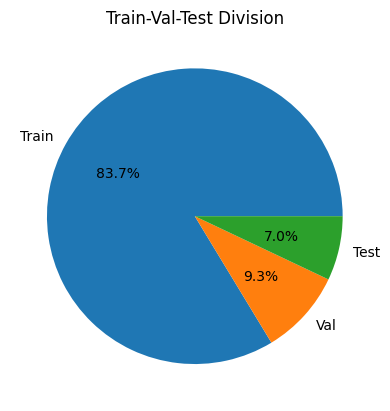

In [5]:
sets_lens = [len(dataset[set]) for set in dataset]
plt.pie(sets_lens,labels=["Train","Val","Test"],autopct="%1.1f%%")
plt.title("Train-Val-Test Division")
plt.show()
#print(sets_lens)

Language/Dialect,Abbreviation,Index
Summerian,SUX,0
Old Babylonian,OLB,1
Middle Babylonian Peripheral,MBP,2
Standard Babylonian,STB,3
Neo-Babylonian,NEB,4
Late Babylonian,LTB,5
Neo-Assyrian,NEA,6


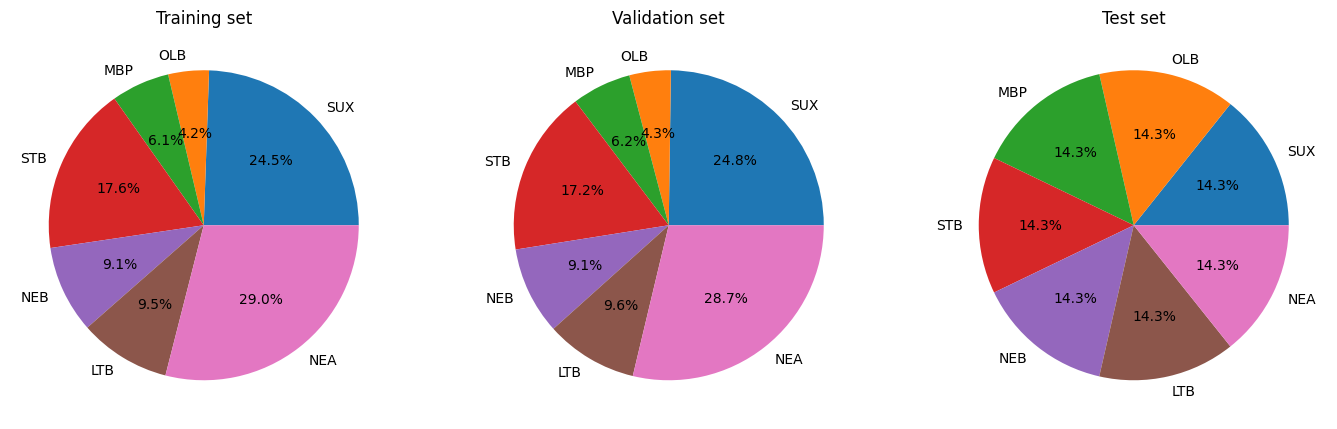

In [6]:
labels_names = ['Summerian','Old Babylonian','Middle Babylonian Peripheral', 'Standard Babylonian', 'Neo-Babylonian', 'Late Babylonian', 'Neo-Assyrian']
labels_abbrevs = ['SUX','OLB','MBP','STB','NEB','LTB','NEA']
labels_table = pd.DataFrame({"Language/Dialect":labels_names, "Abbreviation":labels_abbrevs,"Index":range(7)})
display(labels_table.style.hide(axis='index'))

train_label_counts = {key:np.sum(train_table['label'] == key) for key in range(7)}
val_label_counts = {key:np.sum(val_table['label'] == key) for key in range(7)}
test_label_counts = {key:np.sum(test_table['label'] == key) for key in range(7)}

fig, axs = plt.subplots(1,3,figsize=[17,12])
axs[0].pie(list(train_label_counts.values()),labels=labels_abbrevs,autopct="%1.1f%%"); axs[0].set_title("Training set")
axs[1].pie(val_label_counts.values(),labels=labels_abbrevs,autopct="%1.1f%%"); axs[1].set_title("Validation set")
axs[2].pie(test_label_counts.values(),labels=labels_abbrevs,autopct="%1.1f%%"); axs[2].set_title("Test set");

Mean sentence length: 9.2
20 longest sentences: [484 119 117 114  98  78  77  77  73  72  70  68  67  62  62  62  62  62
  62  61]
100 shortest sentences: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Proportion of sentences longer than 64 characters: 0.0133 %


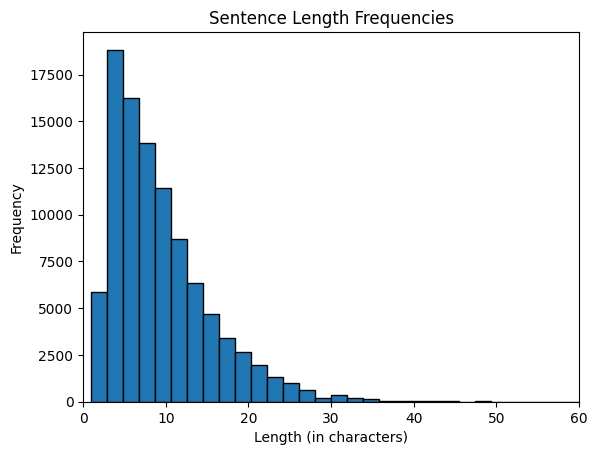

In [7]:
all_sentences = dataset['train']['text'] + dataset['val']['text'] + dataset['test']['text']
sorted_lens = np.array(sorted(list(map(countChars,all_sentences)), reverse=True))
print("Mean sentence length:", np.round(np.mean(sorted_lens),1))
print("20 longest sentences:",sorted_lens[:20])
print("100 shortest sentences:", sorted_lens[-20:])
print("Proportion of sentences longer than 64 characters:",np.round(np.sum(sorted_lens > 64)/len(sorted_lens) * 100,4), "%")
plt.hist(sorted_lens,bins=250,edgecolor='black');
plt.xlabel("Length (in characters)")
plt.ylabel("Frequency")
plt.xlim([0,60])
plt.title("Sentence Length Frequencies");